In [1]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [2]:
def circle(N,R):
    phi = np.arange(0,2*np.pi,2*np.pi/N)    
    return R*np.sin(phi), R*np.cos(phi)

In [3]:
datapath = '/Users/jiayiwu/experiment/bio/bio_network_2'

In [20]:
def make_hex(n1,n2):

    pointx = np.concatenate((np.arange(n1), np.arange(-0.5,n1+0.5,1)),axis = 0)
    
    pointx = np.tile(pointx, n2)
    pointx = np.concatenate((pointx, np.arange(n1)),axis = 0)

    pointy = np.zeros(n1)

    for i in range(1,n2*2+1):
        if i%2==1:
            pointy = np.concatenate((pointy,np.ones(n1+1)*np.sqrt(1-0.5**2)*i),axis = 0)
        else:
            pointy = np.concatenate((pointy,np.ones(n1)*np.sqrt(1-0.5**2)*i),axis = 0)

    i_points = np.array([pointx, pointy[:len(pointx)]]).T
    return i_points, pointx, pointy

def make_boundary(pointx, pointy):
    b_4_x = np.array([pointx[0]-1, pointx[n1-1]+1, pointx[n1]-1, pointx[n1*2]+1])

    b_4_x = np.tile(b_4_x, n2)
    b_4_x = np.concatenate((b_4_x, np.array([pointx[0]-1, pointx[n1-1]+1])))

    b_4_y = np.arange(0, (n2*2+1)*np.sqrt(1-0.5**2), np.sqrt(1-0.5**2))
    b_4_y = np.repeat(b_4_y, 2)

    b_pointx = np.concatenate((np.tile(pointx[n1:2*n1+1], 2),b_4_x))
    b_pointy = np.concatenate((np.ones(n1+1)*np.sqrt(1-0.5**2)*(n2*2+1), -np.ones(n1+1)*np.sqrt(1-0.5**2),b_4_y))
    print(len(b_pointx))
    print(len(b_pointy))
    lens = min(len(b_pointx),len(b_pointy))
    b_points = np.array([b_pointx[:lens], b_pointy[:lens]]).T
    b_4 = np.array([b_4_x, b_4_y]).T
    return b_points

## Geometry of the lattice
### i_points : inner points
### b_points : boundary points

In [43]:
n1 = 8
n2 = 5
i_points,pointx, pointy = make_hex(n1,n2)

# construct boundary points ##


b_points=make_boundary(pointx, pointy)
print(b_points)
points = np.concatenate((i_points, b_points) )

40
40
[[-0.5         9.52627944]
 [ 0.5         9.52627944]
 [ 1.5         9.52627944]
 [ 2.5         9.52627944]
 [ 3.5         9.52627944]
 [ 4.5         9.52627944]
 [ 5.5         9.52627944]
 [ 6.5         9.52627944]
 [ 7.5         9.52627944]
 [-0.5        -0.8660254 ]
 [ 0.5        -0.8660254 ]
 [ 1.5        -0.8660254 ]
 [ 2.5        -0.8660254 ]
 [ 3.5        -0.8660254 ]
 [ 4.5        -0.8660254 ]
 [ 5.5        -0.8660254 ]
 [ 6.5        -0.8660254 ]
 [ 7.5        -0.8660254 ]
 [-1.          0.        ]
 [ 8.          0.        ]
 [-1.5         0.8660254 ]
 [ 8.5         0.8660254 ]
 [-1.          1.73205081]
 [ 8.          1.73205081]
 [-1.5         2.59807621]
 [ 8.5         2.59807621]
 [-1.          3.46410162]
 [ 8.          3.46410162]
 [-1.5         4.33012702]
 [ 8.5         4.33012702]
 [-1.          5.19615242]
 [ 8.          5.19615242]
 [-1.5         6.06217783]
 [ 8.5         6.06217783]
 [-1.          6.92820323]
 [ 8.          6.92820323]
 [-1.5         7.79422

/Users/jiayiwu/anaconda/envs/bio/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


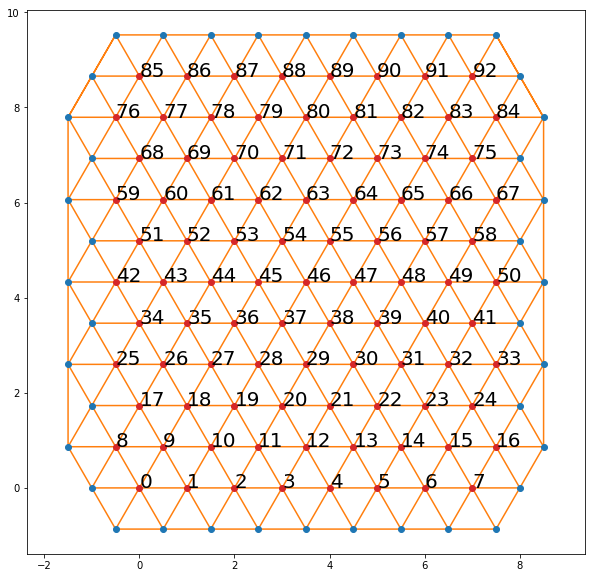

In [44]:
#A1 = np.concatenate((np.array([[0],[0]]),circle(6,5)),axis = 1).T

#np.concatenate((A1,np.array(circle(1/3,8)).T),axis = 0)
#print(points)
num_p = np.shape(i_points)[0]
tri = Delaunay(points)

plt.figure(figsize = (10,10))
plt.plot(b_points[:,0], b_points[:,1], 'o')
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(i_points[:,0], i_points[:,1], 'o')

for i in range(num_p):
    plt.text(points[:,0][i],points[:,1][i],str(i), fontsize =20)
plt.axes().set_aspect('equal', 'datalim')


## Find adjacency matrix
## A : Adjacency matrix
## D : distance matrix

In [45]:
ni = tri.simplices.shape[0]
nj = tri.simplices.shape[1]
N = tri.points.shape[0]
A = np.zeros((N,N))
D = np.zeros((N,N))

for i in range(ni):
    
    sim = tri.simplices[i,:]
    if (sim[0] > num_p-1 and sim[1] > num_p-1 and sim[2] > num_p-1):
        print('all bondary points', sim)
    
    
    elif (sim[0] > len(pointx)-1 and sim[2]>len(pointx)-1):
        A[sim[0],sim[1]] = 1
        A[sim[1],sim[2]] = 1       
        A[sim[1],sim[0]] = 1
        A[sim[2],sim[1]] = 1
        
    elif (sim[2] > len(pointx)-1 and sim[1]>len(pointx)-1):
        A[sim[0],sim[1]] = 1
        
        A[sim[2],sim[0]] = 1
        A[sim[1],sim[0]] = 1
        
        A[sim[0],sim[2]] = 1
        
    elif (sim[0] > len(pointx)-1 and sim[1]>len(pointx)-1):
        
        A[sim[1],sim[2]] = 1
        A[sim[2],sim[0]] = 1
        
        A[sim[2],sim[1]] = 1
        A[sim[0],sim[2]] = 1
    else:
        A[sim[0],sim[1]] = 1
        A[sim[1],sim[2]] = 1
        A[sim[2],sim[0]] = 1
        A[sim[1],sim[0]] = 1
        A[sim[2],sim[1]] = 1
        A[sim[0],sim[2]] = 1
    

dist = pdist(points,'euclidean')
D_temp = squareform(dist)

D = A*D_temp

print('Adjacency matrix is \n', A)
print('Number of edges is', np.sum(np.sum(A))/2)
num_b = int(np.sum(np.sum(A))/2)
#print('Distance matrix is', D)

all bondary points [122 126 124]
all bondary points [125 121 123]
all bondary points [118 116 114]
all bondary points [127 129 125]
all bondary points [129 131  93]
all bondary points [120 118 122]
all bondary points [132 130 101]
all bondary points [130 128 126]
all bondary points [115 117 113]
all bondary points [119 121 117]
Adjacency matrix is 
 [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of edges is 316.0


### Connection matrix is discribed as point labels of two connected points with the direction between them

In [46]:
xx,yy = np.where(np.triu(A)==1)
pwb = np.array([xx,yy]).T
b_hat = []
for i in range(num_b):
    b_hat+= [(points[pwb[i][0]] - points[pwb[i][1]])/la.norm(points[pwb[i][0]] - points[pwb[i][1]])]
connection = np.concatenate((pwb,b_hat), axis = 1)
print('point label, direction vector between them')
print(np.round(connection,2))

point label, direction vector between them
[[  0.     1.    -1.     0.  ]
 [  0.     8.     0.5   -0.87]
 [  0.     9.    -0.5   -0.87]
 ...
 [ 92.   100.     0.5   -0.87]
 [ 92.   101.    -0.5   -0.87]
 [ 92.   132.    -1.     0.  ]]


### Construct C matrix for dynamic matrix D where D = C^T@K@C

In [47]:
# construct C
C = np.zeros((num_b,N*2))
for i in range(num_b):
    C[i][int(2*connection[i][0])] = connection[i][2] #'C[x0]'
    C[i][int(2*connection[i][0])+1] = connection[i][3]
    C[i][int(2*connection[i][1])] = -connection[i][2]
    C[i][int(2*connection[i][1])+1] = -connection[i][3]
print(np.shape(C))
print(C)
Cde = C[:, :2*len(i_points[:,0])]  # delete cols of C that corresponding to the fixed points

print(np.shape(Cde))
print(Cde)

(316, 266)
[[-1.         0.         1.        ...  0.         0.         0.       ]
 [ 0.5       -0.8660254  0.        ...  0.         0.         0.       ]
 [-0.5       -0.8660254  0.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         1.        -0.       ]]
(316, 186)
[[-1.         0.         1.        ...  0.         0.         0.       ]
 [ 0.5       -0.8660254  0.        ...  0.         0.         0.       ]
 [-0.5       -0.8660254  0.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.5       -0.8660254]
 [ 0.         0.         0.        ...  0.        -0.5       -0.8660254]
 [ 0.         0.         0.        ...  0.        -1.         0.       ]]


### plot the first few modes for random k

(266, 266)
energies are
[ 0.47  0.58  0.79  0.99  1.21  1.34  1.39  1.53  1.67  1.81  2.01  2.15
  2.2   2.34  2.46  2.59  2.62  2.82  2.86  2.97  3.13  3.17  3.43  3.59
  3.71  3.76  3.86  3.91  4.1   4.23  4.37  4.41  4.62  4.78  4.83  4.9
  5.08  5.24  5.4   5.45  5.51  5.64  5.87  5.9   5.99  6.37  6.4   6.49
  6.6   6.81  6.89  7.01  7.17  7.45  7.53  7.63  7.67  7.81  7.99  8.1
  8.17  8.31  8.52  8.67  8.78  8.89  8.98  9.18  9.29  9.49  9.63  9.76
  9.9  10.02 10.12 10.37 10.47 10.69 10.77 10.88 10.91 11.01 11.06 11.28
 11.35 11.52 11.66 11.88 12.03 12.18 12.3  12.35 12.52 12.95 13.06 13.09
 13.2  13.53 13.8  14.05 14.08 14.32 14.71 14.79 15.05 15.32 15.4  15.49
 15.7  15.94 16.09 16.22 16.36 16.61 16.75 17.09 17.26 17.44 17.8  17.9
 18.   18.23 18.57 19.12 19.36 19.73 20.07 20.19 20.24 20.59 21.17 21.47
 21.59 21.93 22.23 22.46 22.74 22.92 23.34 23.41 23.61 24.29 24.49 24.61
 24.74 24.95 25.45 25.6  25.73 26.08 26.41 26.73 27.34 27.51 27.58 27.72
 27.8  28.13 28.29 28.55 28.71

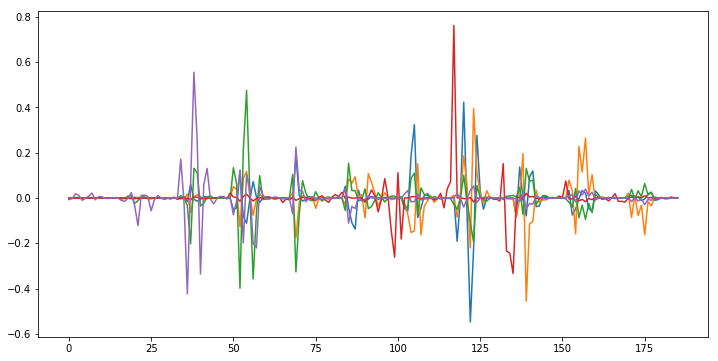

In [48]:
k = (np.random.rand(num_b))*10
K = np.diag(k)
print(np.shape(C.T@K@C))
plt.figure(figsize = (12,6))
for i in range(5):
    plt.plot(np.round(la.eig(Cde.T@K@Cde)[1],3)[:,i])
print('energies are')
print(np.round(np.sort(la.eig(Cde.T@K@Cde)[0]),2))

In [49]:
def multiline(xs, ys, c, ax=None, **kwargs):
    from matplotlib.collections import LineCollection
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc


/Users/jiayiwu/anaconda/envs/bio/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


93 316


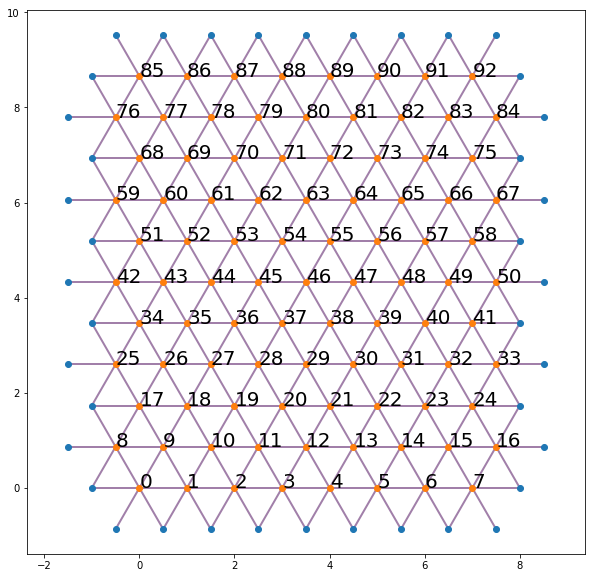

In [50]:
xcon = []
ycon = []
plt.figure(figsize = (10,10))
plt.plot(b_points[:,0], b_points[:,1], 'o')
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(i_points[:,0], i_points[:,1], 'o')
for i in range(num_b):

        
        x0, y0 = points[int(connection[i][0])]
        x1, y1 = points[int(connection[i][1])]

        xcon.append([x0, x1])
        ycon.append([y0, y1])

elongation = Cde @ np.zeros(num_p*2)+1
lc = multiline(xcon, ycon, elongation, lw=2, alpha=0.5)
for i in range(num_p):
    plt.text(points[:,0][i],points[:,1][i],str(i), fontsize =20)
plt.axes().set_aspect('equal', 'datalim')
name = 'network_tri_num_p_%d_num_b_%d_fixed'%(num_p,num_b)
plt.savefig(datapath + '/'+name +'.png')
print(num_p,num_b)

In [51]:
np.save(datapath +'/'+ name + "_C", C)
np.save(datapath +'/'+ name + "_Cde", Cde)
np.save(datapath +'/'+ name + "_points", points)
np.save(datapath +'/'+ name + "_i_points", i_points)
np.save(datapath +'/'+ name + "_b_points", b_points)
np.save(datapath +'/'+ name + "_Connection", connection)
